Epoch 1/10


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 415ms/step - accuracy: 0.5666 - loss: 0.6829 - val_accuracy: 0.7784 - val_loss: 0.5947
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 411ms/step - accuracy: 0.8073 - loss: 0.5409 - val_accuracy: 0.8436 - val_loss: 0.4049
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 410ms/step - accuracy: 0.8621 - loss: 0.3643 - val_accuracy: 0.8583 - val_loss: 0.3329
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 410ms/step - accuracy: 0.8860 - loss: 0.2868 - val_accuracy: 0.8700 - val_loss: 0.3046
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 412ms/step - accuracy: 0.9056 - loss: 0.2443 - val_accuracy: 0.8744 - val_loss: 0.2944
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 412ms/step - accuracy: 0.9194 - loss: 0.2088 - val_accuracy: 0.8772 - val_loss: 0.2906
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 413ms/step - accuracy: 0.9315 - loss: 0.1855 - val_accuracy: 0.8802 - val_loss: 0.2872
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 412ms/step - accuracy: 0.9451 - loss: 0.1555 - val_accuracy: 0.880

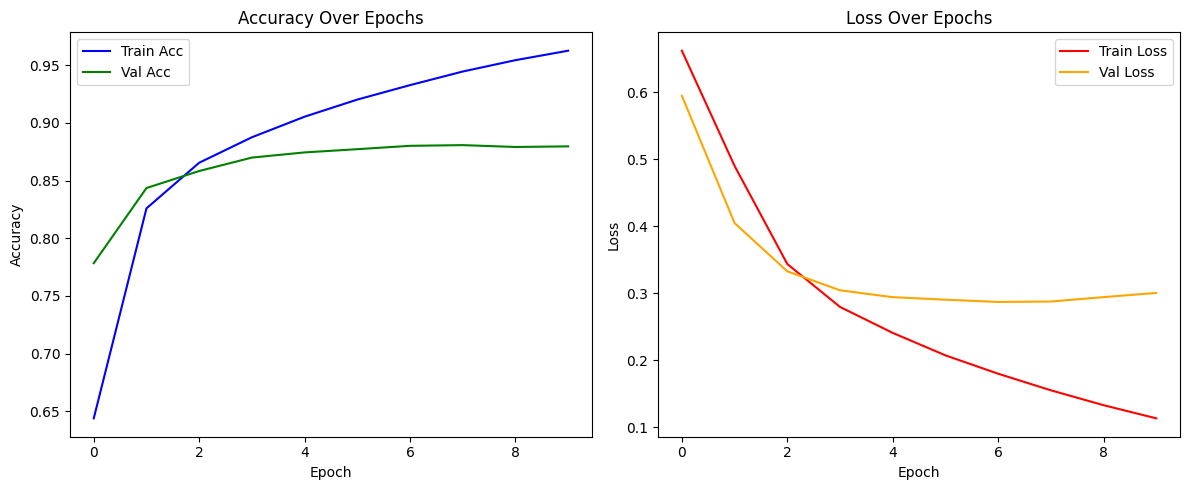

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8796 - loss: 0.2999
Test Loss: 0.30068808794021606
Test Accuracy: 0.8796799778938293
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
Classificatio Report
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     12500
           1       0.89      0.87      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Probability: 0.7699837684631348
Predicted Sentiment: Positive
Actual Sentiment: Positive


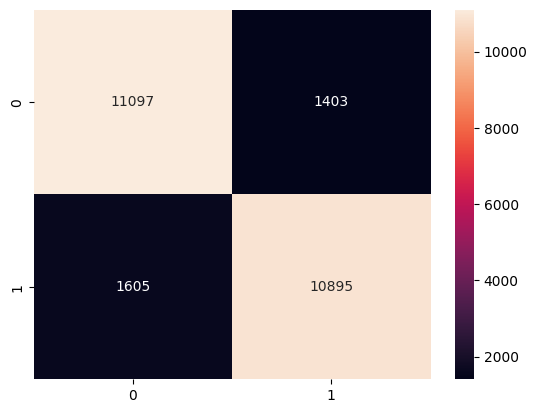

In [ ]:
import pandas as pd
df=pd.read_csv('IMDB_Dataset.csv')
df
df['review']=df['review'].str.replace('<br /><br />','')

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sentiment']=le.fit_transform(df['sentiment'])

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

x=cv.fit_transform(df['review'])
y=df['sentiment']
x.shape
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
x.shape
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential,layers
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(layers.Input(shape=(x_train.shape[1],),sparse=True))
model.add(Dense(64,activation='relu'))
model.add(Dense(28,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=16,batch_size=512,validation_split=0.2)
loss, accuracy=model.evaluate(x_test,y_test)
pred_prob=model.predict(x_test)
pred=(pred_prob>0.5).astype(int)
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,pred)
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.show()
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
print(classification_report(y_test,pred))